# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:



In [ ]:
!pip install datasets


In [2]:
from datasets import load_dataset

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#data cleaning
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def into_list(skills):
  if(pd.isna(skills)):
    return []
  else:
    return ast.literal_eval(skills)
df['job_skills']=df['job_skills'].apply(into_list)

EXPLORING DATA ANALYSIS IN US


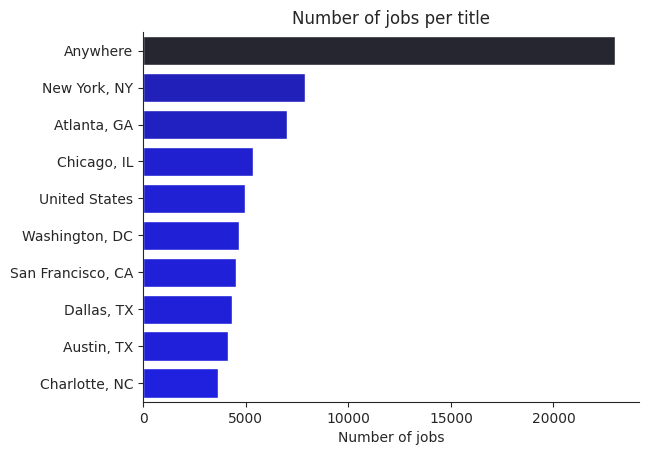

In [4]:
import seaborn as sns
sns.set_style('ticks')
df_US=df[df['job_country']=='United States']
df_job_location=df_US['job_location'].value_counts().head(10)
df_job_location=df_job_location.to_frame()
sns.barplot(data=df_job_location,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()# removes border around the plot
plt.title('Number of jobs per title')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()


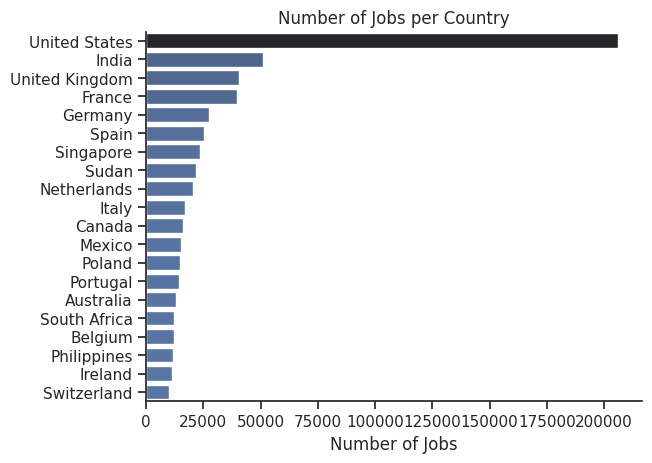

In [8]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

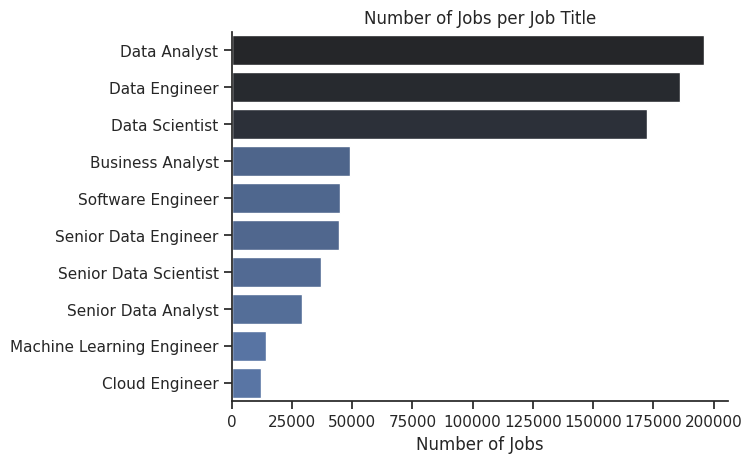

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

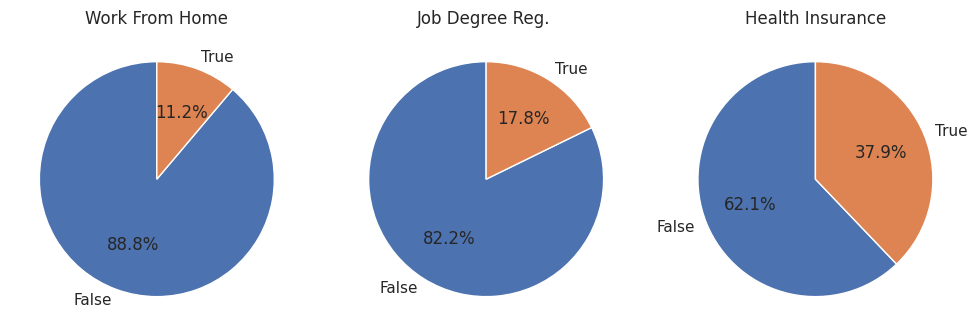

In [6]:
fig,ax=plt.subplots(1,3)
fig.set_size_inches(15,5)
dict_column={
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Job Degree Reg. ',
    'job_health_insurance':'Health Insurance'
}
for i,(column,title) in enumerate(dict_column.items()):
  df_US[column].value_counts().plot(kind='pie',ax=ax[i],title=title,autopct="%1.1f%%",startangle=90,figsize=(10,5))
  ax[i].set_ylabel("")
fig.tight_layout()

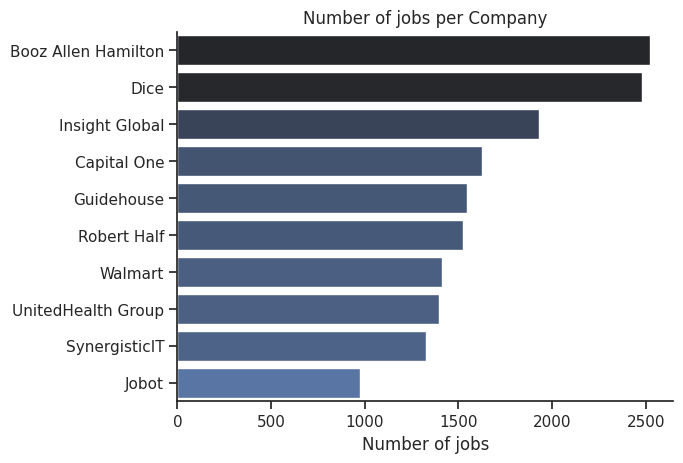

In [9]:
df_job_=df_US['company_name'].value_counts().head(10)
df_job_=df_job_.to_frame()
sns.barplot(data=df_job_,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()# removes border around the plot
plt.title('Number of jobs per Company')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()